In [1]:
!sudo apt-get install -y python3-mpi4py

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  python3-numpy
The following NEW packages will be installed:
  python3-mpi4py
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 465 kB of archives.
After this operation, 1,857 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 python3-mpi4py amd64 3.1.3-1build2 [465 kB]
Fetched 465 kB in 1s (594 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package python3-mpi4p

In [2]:
!apt-get install -qq mpich
!pip install mpi4py

Selecting previously unselected package libslurm37.
(Reading database ... 131074 files and directories currently installed.)
Preparing to unpack .../libslurm37_21.08.5-2ubuntu1_amd64.deb ...
Unpacking libslurm37 (21.08.5-2ubuntu1) ...
Selecting previously unselected package hwloc-nox.
Preparing to unpack .../hwloc-nox_2.7.0-2ubuntu1_amd64.deb ...
Unpacking hwloc-nox (2.7.0-2ubuntu1) ...
Selecting previously unselected package libmpich12:amd64.
Preparing to unpack .../libmpich12_4.0-3_amd64.deb ...
Unpacking libmpich12:amd64 (4.0-3) ...
Selecting previously unselected package mpich.
Preparing to unpack .../archives/mpich_4.0-3_amd64.deb ...
Unpacking mpich (4.0-3) ...
Selecting previously unselected package libmpich-dev:amd64.
Preparing to unpack .../libmpich-dev_4.0-3_amd64.deb ...
Unpacking libmpich-dev:amd64 (4.0-3) ...
Setting up libslurm37 (21.08.5-2ubuntu1) ...
Setting up hwloc-nox (2.7.0-2ubuntu1) ...
Setting up libmpich12:amd64 (4.0-3) ...
Setting up mpich (4.0-3) ...
Setting up

In [11]:
import time
import numpy as np
import matplotlib.pyplot as plt

## Importing my other two .py files for the comparison

In [41]:
import sys
sys.path.append('/content/')

from Multiprocess_python import compute_pi_parallel
from Pure_python import compute_pi_sequential


## Including the mpi code directly

In [33]:
mpi_code = """
from mpi4py import MPI
import math
import time

def compute_pi_distributed(N):
    comm = MPI.COMM_WORLD
    size = comm.Get_size()
    rank = comm.Get_rank()
    delta_x = 1.0 / N
    local_n = N // size
    start_time = time.time() if rank == 0 else None  # Start timer on root process

    local_sum = sum(math.sqrt(1 - (i * delta_x)**2) * delta_x for i in range(rank * local_n, (rank + 1) * local_n))
    total_sum = comm.reduce(local_sum, op=MPI.SUM, root=0)

    if rank == 0:
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"Approximation of π: {total_sum * 4}")
        print(f"Execution time: {execution_time} seconds")

if __name__ == "__main__":
    N = 1000000  # Example, adjust as needed
    compute_pi_distributed(N)

"""

with open("mpi_pi.py", "w") as file:
  file.write(mpi_code)

# Using the time function already implemented in the code to check the time taken and the approximation

In [42]:
!python Pure_python.py

Approximation of π: 3.1415946524138207
Execution time: 0.3828415870666504 seconds


In [50]:
!python Multiprocess_python.py

Approximation of π: 3.141594652413769
Execution time: 0.4013338088989258 seconds


In [44]:
!mpiexec --allow-run-as-root --oversubscribe -n 4 python mpi_pi.py

Approximation of π: 3.141594652413769
Execution time: 0.3468508720397949 seconds


## Visualizing it with the respective times taken

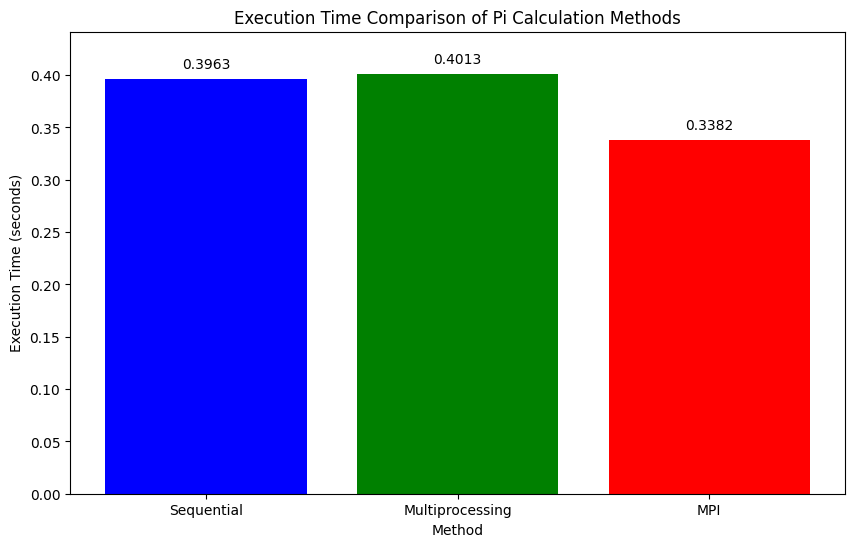

In [53]:
import matplotlib.pyplot as plt

# Define the execution times for each method
methods = ['Sequential', 'Multiprocessing', 'MPI']
times = [0.3963477611541748, 0.4013338088989258, 0.3381772041320801]

# Create a bar chart for the execution times
plt.figure(figsize=(10, 6))
plt.bar(methods, times, color=['blue', 'green', 'red'])

# Add labels and title
plt.ylabel('Execution Time (seconds)')
plt.xlabel('Method')
plt.title('Execution Time Comparison of Pi Calculation Methods')
plt.ylim(0, max(times) * 1.1)  # Set the y-axis limit a bit higher than the max time

# Annotate the bars with the exact time values
for i, time in enumerate(times):
    plt.text(i, time + 0.01, f'{time:.4f}', ha = 'center', color = 'black')

# Display the plot
plt.show()